# Prirejanja v dvodelnih grafih

Poiščimo maksimalno prirejanje v neuteženem dvodelnem grafu.

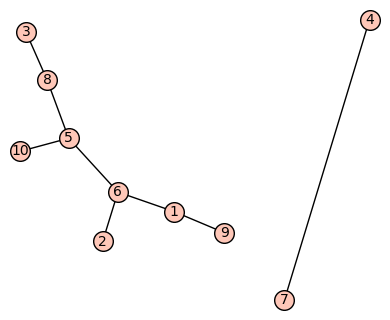

[(10, 5, None), (2, 6, None), (8, 3, None), (4, 7, None), (1, 9, None)]

In [1]:
G1 = Graph([(1, 6), (1, 9), (2, 6), (3, 8), (4, 7), (5, 6), (5, 8), (5, 10)])
G1.show()
G1.matching()

Z matriko `M` podamo uteži na povezavah v uteženem polnem dvodelnem grafu. Poiskali bomo najtežje popolno prirejanje.

In [2]:
M = Matrix([[58, 60, 57, 60],
            [66, 68, 65, 66],
            [56, 57, 55, 54],
            [51, 52, 53, 51]])
G2 = Graph([(('r', i), ('c', j), w) for i, r in enumerate(M) for j, w in enumerate(r)])
G2.matching(use_edge_labels=True)

[(('c', 0), ('r', 2), 56),
 (('r', 3), ('c', 2), 53),
 (('r', 1), ('c', 1), 68),
 (('r', 0), ('c', 3), 60)]

Najlažje popolno prirejanje v dvodelnem grafu bomo poiskali s pomočjo pomožnega grafa, v katerem uteži odštejemo od največje.

In [3]:
m = max(M.list())
MM = m * ones_matrix(4, 4) - M
MM

[10  8 11  8]
[ 2  0  3  2]
[12 11 13 14]
[17 16 15 17]

In [4]:
G3 = Graph([(('r', i), ('c', j), w) for i, r in enumerate(MM) for j, w in enumerate(r)])
[(u, v, m - w) for u, v, w in G3.matching(use_edge_labels=True)]

[(('r', 3), ('c', 1), 52),
 (('c', 0), ('r', 1), 66),
 (('r', 2), ('c', 3), 54),
 (('r', 0), ('c', 2), 57)]

# Pretoki in prerezi

Podajmo usmerjen graf z uteženimi povezavami.

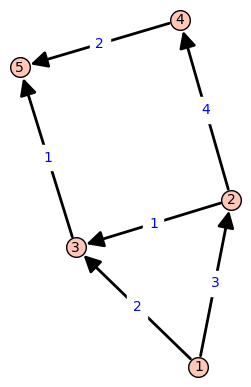

In [5]:
G4 = DiGraph([(1, 2, 3), (1, 3, 2), (2, 3, 1), (2, 4, 4), (3, 5, 1), (4, 5, 2)])
G4.plot(edge_labels=True, save_pos=True)

Poiščimo največji pretok od vozlišča 1 do vozlišča 5.

In [6]:
G4.flow(1, 5)

3

Zahtevamo lahko tudi, naj nam metoda `flow` vrne graf, ki predstavlja največji pretok.

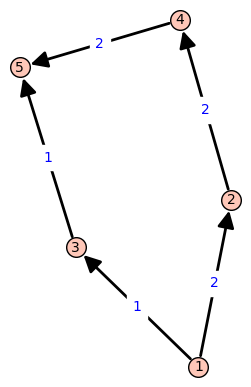

In [7]:
f, F = G4.flow(1, 5, value_only=False)
F.plot(edge_labels=True)

Poiščimo še minimalni prerez - to je ravno množica zasičenih povezav, katerih začetno vozlišče je po nezasičenih povezavah dosegljivo iz izvora, končno pa ne.

In [8]:
cut = [(u, v) for u, v, w in G4.edges() if F.has_edge(u, v) and F.edge_label(u, v) == w]
H = G4.copy()
H.delete_edges(cut)
S = H.connected_component_containing_vertex(1)
min_cut = [(u, v, G4.edge_label(u, v)) for u, v in cut if u in S and v not in S]
min_cut

[(3, 5, 1), (4, 5, 2)]